# Configs


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import msgpack

pd.set_option("display.max_colwidth", None)
LOGS_DIR = "/Users/paulo/Developer/python/espy-user-mobility/logs/1200-steps"


def head_msgpack(filepath, num_of_records=100) -> pd.DataFrame:
    with open(filepath, "rb") as f:
        unpacker = msgpack.Unpacker(f, raw=False)
        data = []
        for i, record in enumerate(unpacker):
            if i >= num_of_records:
                break
            for metric in record:
                data.append(metric)
        return pd.DataFrame(data)


# Edge/Cloud Server


In [34]:
df_edge_server = head_msgpack(f"{LOGS_DIR}/EdgeServer.msgpack")
# df_edge_server = df_edge_server[df_edge_server["Time Step"] != 0]
df_edge_server

FileNotFoundError: [Errno 2] No such file or directory: '/Users/paulo/Developer/python/espy-user-mobility/logs/EdgeServer.msgpack'

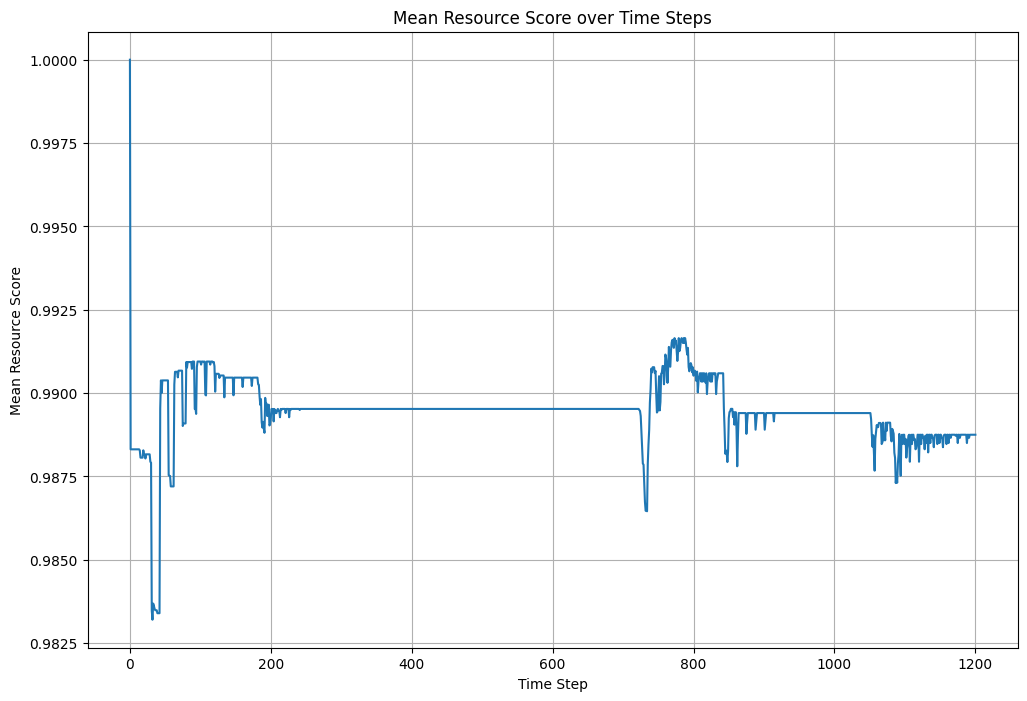

In [6]:
# Calculate the mean of "Resource Score" for each "Time Step"
mean_resource_score = df_edge_server.groupby("Time Step")["Resources Score"].mean()

# Plot the mean "Resource Score" over "Time Step"
plt.figure(figsize=(12, 8))
plt.plot(mean_resource_score.index, mean_resource_score.values)
plt.xlabel("Time Step")
plt.ylabel("Mean Resource Score")
plt.title("Mean Resource Score over Time Steps")
plt.grid(True)
plt.show()


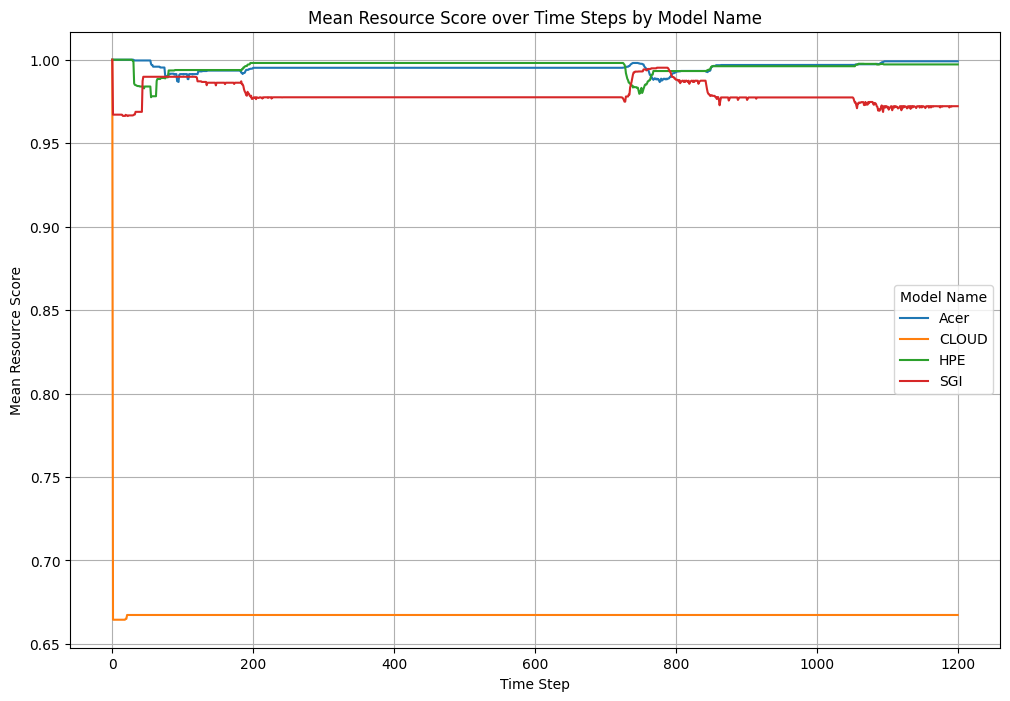

In [ ]:
# Calculate the mean "Resource Score" for each "Model Name" grouped by "Time Step", excluding "Time Step" 0
# mean_resource_score_model = df_edge_server[df_edge_server["Time Step"] != 0].groupby(["Time Step", "Model Name"])["Resources Score"].mean().unstack()
mean_resource_score_model = df_edge_server.groupby(["Time Step", "Model Name"])["Resources Score"].mean().unstack()

# Plot the mean "Resource Score" for each "Model Name" over "Time Step"
plt.figure(figsize=(12, 8))
for model in mean_resource_score_model.columns:
    plt.plot(mean_resource_score_model.index, mean_resource_score_model[model], label=model)

plt.xlabel("Time Step")
plt.ylabel("Mean Resource Score")
plt.title("Mean Resource Score over Time Steps by Model Name")
plt.legend(title="Model Name")
plt.grid(True)
plt.show()

In [33]:
# Calculate the mean "Power Consumption" for each "Model Name" grouped by "Time Step"
mean_power_consumption_model = df_edge_server.groupby(["Time Step", "Model Name"])["Power Consumption"].mean().unstack()

# Plot the mean "Power Consumption" for each "Model Name" over "Time Step"
plt.figure(figsize=(12, 8))
for model in mean_power_consumption_model.columns:
    plt.plot(mean_power_consumption_model.index, mean_power_consumption_model[model], label=model)

plt.xlabel("Time Step")
plt.yscale("log")
plt.ylabel("Mean Power Consumption")
plt.title("Mean Power Consumption over Time Steps by Model Name")
plt.legend(title="Model Name")
plt.grid(True)
plt.show()

NameError: name 'df_edge_server' is not defined

# Services


In [3]:
df_service = head_msgpack(f"{LOGS_DIR}/Service.msgpack")
# df_service = df_service[df_service["Time Step"] != 0]
df_service

,Object,Time Step,Instance ID,Available,Server,Being Provisioned,Last Migration,Total Distance From Users
0,Service_1,0,1,False,NaN,False,None,0.000000
1,Service_2,0,2,False,NaN,False,None,0.000000
2,Service_3,0,3,False,NaN,False,None,0.000000
3,Service_4,0,4,False,NaN,False,None,0.000000
4,Service_5,0,5,False,NaN,False,None,0.000000
...,...,...,...,...,...,...,...,...
144115,Service_116,1200,116,True,819.0,False,"{'status': 'finished', 'origin': 'EdgeServer_791', 'target': 'EdgeServer_819', 'start': 1087, 'end': 1090, 'waiting': 0, 'pulling': 3, 'migr_state': 0}",0.791558
144116,Service_117,1200,117,True,894.0,False,"{'status': 'finished', 'origin': 'EdgeServer_717', 'target': 'EdgeServer_894', 'start': 1094, 'end': 1095, 'waiting': 0, 'pulling': 1, 'migr_state': 0}",0.780652
144117,Service_118,1200,118,True,506.0,False,"{'status': 'finished', 'origin': 'EdgeServer_427', 'target': 'EdgeServer_506', 'start': 751, 'end': 753, 'waiting': 0, 'pulling': 2, 'migr_state': 0}",0.669121
144118,Service_119,1200,119,True,606.0,False,"{'status': 'finished', 'origin': 'EdgeServer_583', 'target': 'EdgeServer_606', 'start': 789, 'end': 790, 'waiting': 0, 'pulling': 1, 'migr_state': 0}",0.669121


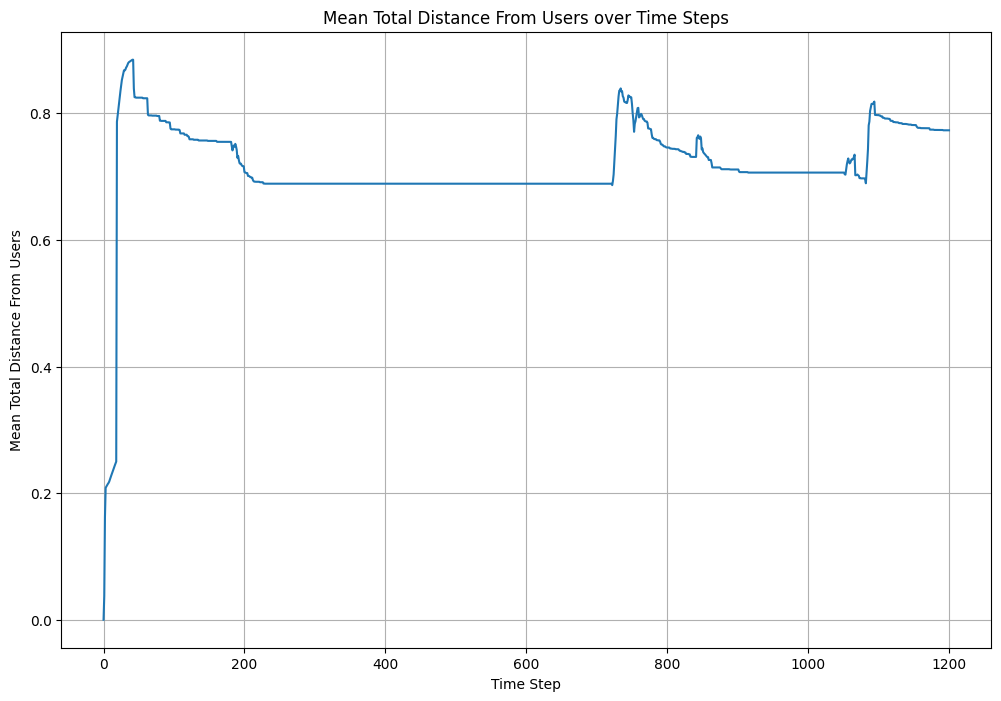

In [4]:
# Calculate the mean "Total Distance From Users" for each "Time Step"
mean_distance = df_service.groupby("Time Step")["Total Distance From Users"].mean()

# Plot the mean "Total Distance From Users" over "Time Step"
plt.figure(figsize=(12, 8))
plt.plot(mean_distance.index, mean_distance.values)
plt.xlabel("Time Step")
plt.ylabel("Mean Total Distance From Users")
plt.title("Mean Total Distance From Users over Time Steps")
plt.grid(True)
plt.show()

# Users


In [5]:
df_user = head_msgpack(f"{LOGS_DIR}/User.msgpack")
df_user

,Object,Time Step,Instance ID,Coordinates,Coordinates Trace,Point of Interest,Applications,Base Station,Delays,Communication Paths
0,User_1,0,1,"[36, 32]","[[36, 32]]",None,"[{'class': 'Application', 'id': 1}]","BaseStation_3219 ([36, 32])",{},{}
1,User_2,0,2,"[94, 58]","[[94, 58]]",None,"[{'class': 'Application', 'id': 1}]","BaseStation_5848 ([94, 58])",{},{}
2,User_3,0,3,"[114, 14]","[[114, 14]]",None,"[{'class': 'Application', 'id': 2}]","BaseStation_1458 ([114, 14])",{},{}
3,User_4,0,4,"[170, 76]","[[170, 76]]",None,"[{'class': 'Application', 'id': 2}]","BaseStation_7686 ([170, 76])",{},{}
4,User_5,0,5,"[146, 98]","[[146, 98]]",None,"[{'class': 'Application', 'id': 2}]","BaseStation_9874 ([146, 98])",{},{}
...,...,...,...,...,...,...,...,...,...,...
210170,User_171,1200,171,"[96, 58]","[[164, 80], [164, 80], [159, 78], [154, 76], [149, 74], [144, 72], [139, 70], [134, 68], [129, 66], [124, 64], [119, 62], [114, 61], [109, 60], [104, 59], [99, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], ...]",Terminal_Norte_Manha,"[{'class': 'Application', 'id': 32}]","BaseStation_8083 ([164, 80])",{'32': 247},"{'32': [[8083, 8082, 8081, 8080, 8079, 8078, 8077, 8076, 8075, 8074, 8073, 8072, 8071, 8070, 8069, 8068, 8067, 8066, 8065, 8064, 8063, 8062, 8061, 8160, 8260, 8359, 8459, 8558, 8658, 8757, 8857, 8956, 9056, 9155, 9255, 9354, 9454, 9553, 9653, 9752, 9852, 9951, 10003], [10003, 9951, 9851, 9750, 9650, 9549, 9449, 9348, 9248, 9147, 9047, 8946, 8846, 8745, 8645, 8544, 8444, 8343, 8243, 8142, 8042, 7941, 7841, 7740, 7640, 7539, 7439, 7338, 7238, 7137, 7037, 6936, 6836, 6735, 6636, 6536, 6437, 6337, 6238, 6138, 6039, 5939, 5840, 5740, 5641, 5541, 5442, 5342, 5243, 5143, 5044, 4944, 4845, 4745, 4646, 4546, 4447, 4347, 4248, 4148, 4049, 3949, 3850, 3750, 3651, 3551, 3452, 3352, 3253, 3153, 3054, 2954], [2954, 3054, 3153, 3253, 3352, 3452, 3551, 3651, 3750, 3850, 3949, 4049, 4148, 4248, 4347, 4447, 4546, 4646, 4745, 4845, 4944, 5044, 5143, 5243, 5342, 5442, 5542, 5643, 5743, 5844, 5944, 6045, 6145, 6246, 6346, 6447, 6547, 6648, 6748, 6849, 6949], [6949, 6849, 6748, 6648, 6547, 6546, 6545, 6544, 6543, 6443, 6342, 6242, 6141, 6041, 5940, 5840, 5739], [5739, 5640, 5540, 5441, 5341, 5342], [5342, 5443, 5543, 5644, 5744, 5845, 5945, 5946, 5947, 6048, 6148, 6249, 6349, 6450, 6550, 6651, 6751, 6852], [], [6852, 6851, 6850, 6849, 6848, 6847, 6846, 6845, 6844, 6843, 6842, 6841, 6840, 6839, 6838, 6837, 6836, 6835, 6834, 6933, 7033, 7132, 7232, 7331, 7431, 7530, 7630, 7729, 7829, 7928, 8028, 8127, 8227, 8326, 8426, 8525, 8625, 8724]]}"
210171,User_172,1200,172,"[96, 58]","[[93, 27], [93, 27], [93, 27], [93, 27], [93, 27], [93, 34], [93, 41], [94, 48], [95, 55], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 58], [96, 5

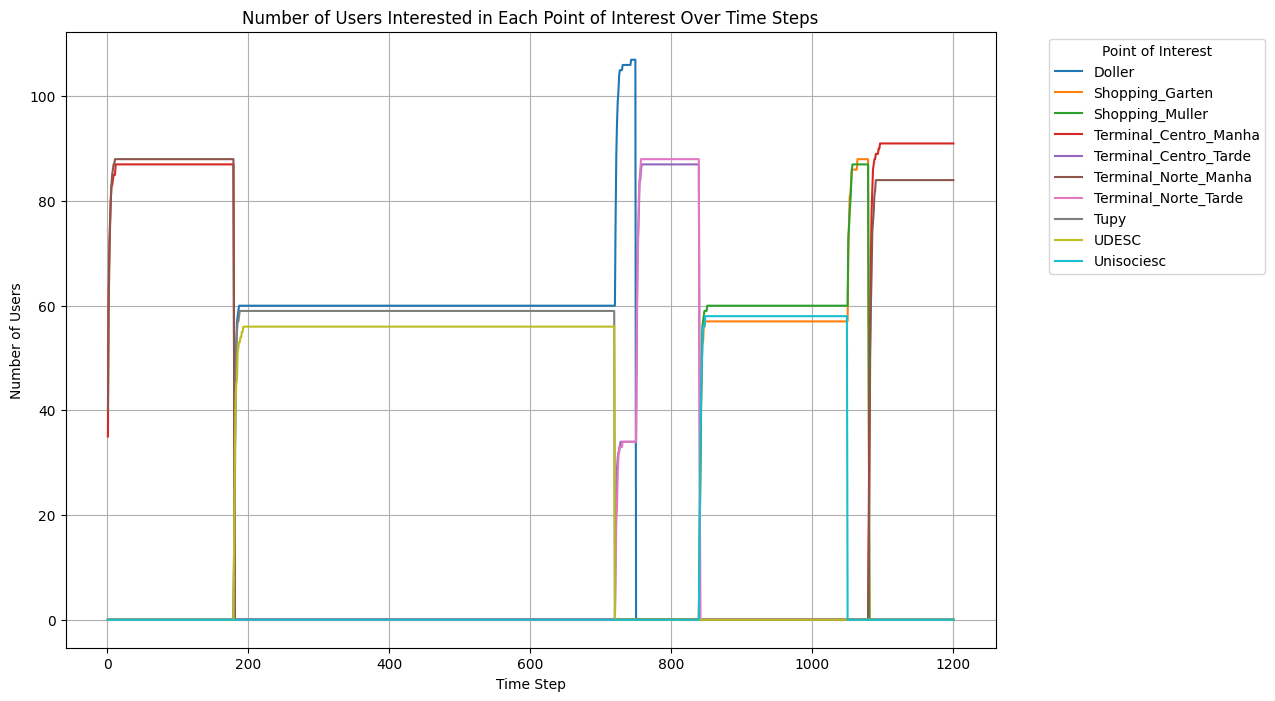

In [ ]:
# Group by "Time Step" and "Point of Interest" and count the number of users
poi_counts = df_user.groupby(["Time Step", "Point of Interest"]).size().unstack(fill_value=0)

# Plot the number of users interested in each "Point of Interest" over "Time Step"
plt.figure(figsize=(12, 8))
for poi in poi_counts.columns:
    plt.plot(poi_counts.index, poi_counts[poi], label=poi)

plt.xlabel("Time Step")
plt.ylabel("Number of Users")
plt.title("Number of Users Interested in Each Point of Interest Over Time Steps")
plt.legend(title="Point of Interest", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

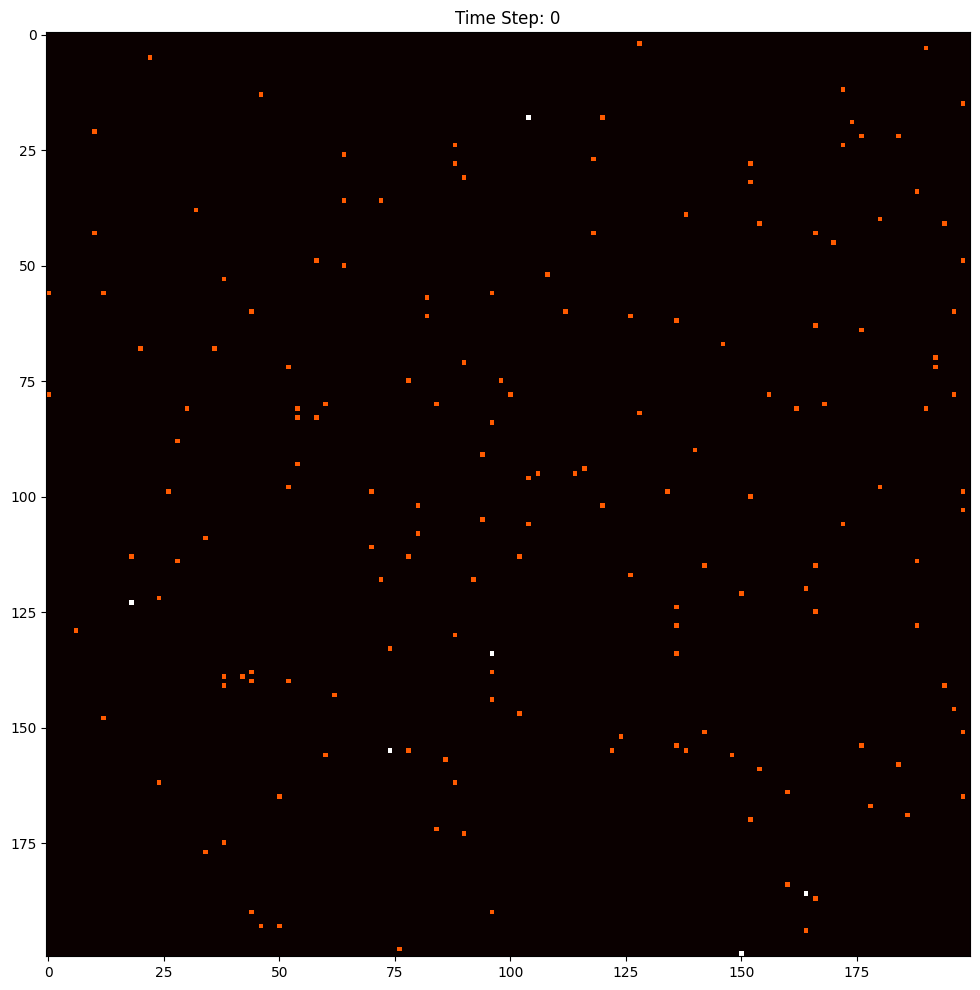

In [31]:
# Extract coordinates and time steps
coordinates = df_user["Coordinates"]
time_steps = df_user["Time Step"]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Initialize the heatmap
heatmap = ax.imshow(np.zeros((200, 200)), cmap="hot", interpolation="nearest")


def update(frame):
    # Clear the previous heatmap
    ax.clear()

    # Filter coordinates for the current time step
    current_coords = coordinates[time_steps == frame]

    # Create a heatmap array
    heatmap_array = np.zeros((200, 200))
    for coord in current_coords:
        heatmap_array[coord[0], coord[1] * 2] += 1

    # Update the heatmap
    heatmap = ax.imshow(heatmap_array, cmap="hot", interpolation="nearest")
    ax.set_title(f"Time Step: {frame}")
    return (heatmap,)


# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(time_steps.min(), time_steps.max() + 1), blit=True)

# Display the animation
plt.show()
ani.save("user_heatmap.gif", writer="pillow", fps=30)

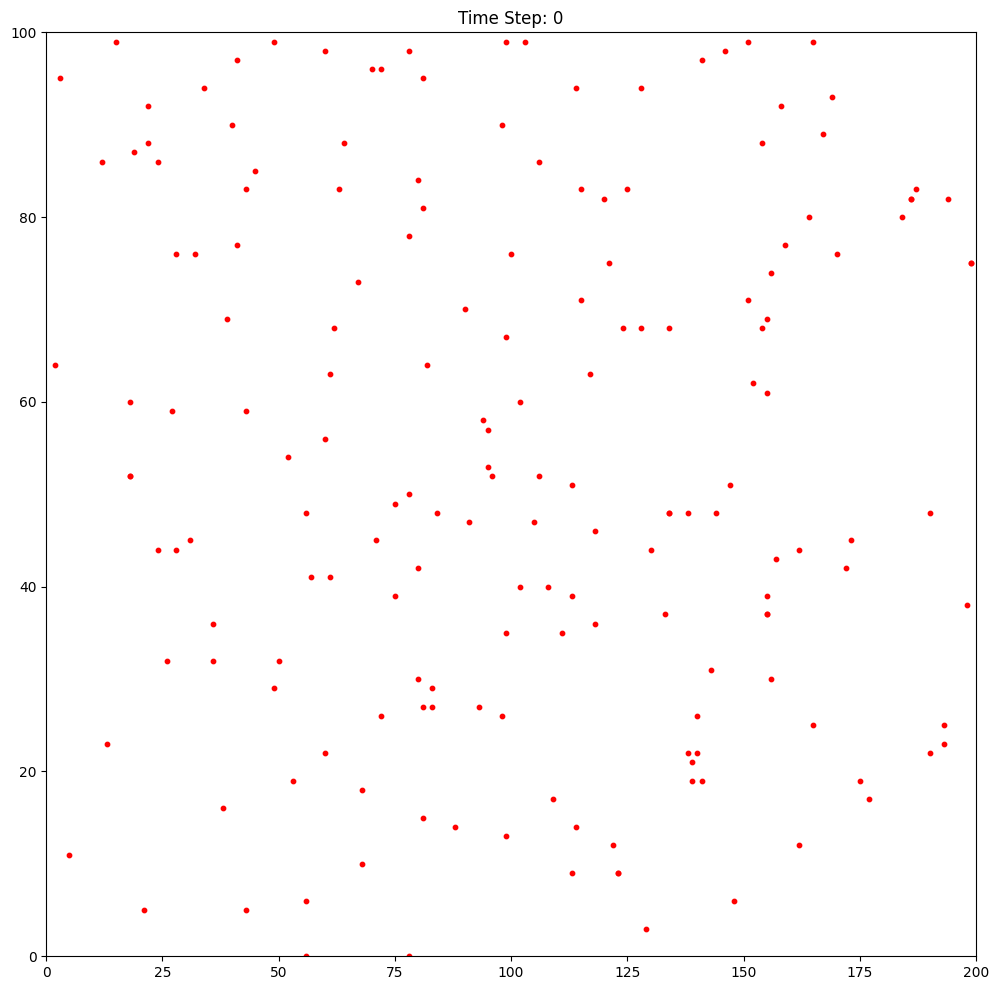

In [32]:
# Extract unique time steps
unique_time_steps = df_user["Time Step"].unique()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Initialize the scatter plot
scatter = ax.scatter([], [], c="red", s=10)

# Set axis limits
ax.set_xlim(0, 200)
ax.set_ylim(0, 100)


def update(frame):
    # Filter coordinates for the current time step
    current_coords = df_user[df_user["Time Step"] == frame]["Coordinates"]

    # Update scatter plot data
    scatter.set_offsets(current_coords.tolist())
    ax.set_title(f"Time Step: {frame}")
    return (scatter,)


# Create the animation
ani = animation.FuncAnimation(fig, update, frames=unique_time_steps, blit=True)

# Display the animation
plt.show()
ani.save("user_coordinates.gif", writer="pillow", fps=30)